In [4]:
# Imports

from sqlalchemy import create_engine, text, inspect, Table
import pandas as pd

In [5]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory (directory above the current directory)
parent_directory = os.path.dirname(current_directory)

# List all folders in the parent directory
folders_in_parent_directory = [folder for folder in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, folder))]

# Print the list of folders
print("Folders in the parent directory:")
for folder in folders_in_parent_directory:
    print(folder)

Folders in the parent directory:
.git
dashboard
data
notebook
scrape-data


In [6]:
weather_df = pd.read_csv("../data/weather/weather.csv", delimiter=",").drop(['index'],axis=1)
print(weather_df.head())

         date  temp_mean  temp_max  temp_min           sunrise  \
0  2015-01-01        3.1       5.2       1.6  2015-01-01T10:43   
1  2015-01-02        4.8       6.4       3.4  2015-01-02T10:43   
2  2015-01-03        3.2       3.9       2.3  2015-01-03T10:42   
3  2015-01-04        2.0       2.2       1.7  2015-01-04T10:41   
4  2015-01-05       -1.6       1.6      -4.7  2015-01-05T10:41   

             sunset  rain  snow        country    capital  
0  2015-01-01T16:43   0.0   0.0  Aland Islands  Mariehamn  
1  2015-01-02T16:45   9.5   0.0  Aland Islands  Mariehamn  
2  2015-01-03T16:46   0.6   0.0  Aland Islands  Mariehamn  
3  2015-01-04T16:48   0.0   0.0  Aland Islands  Mariehamn  
4  2015-01-05T16:49   0.0   0.0  Aland Islands  Mariehamn  


In [7]:
# Create a SQLAlchemy engine to connect to the PostgreSQL database
engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")

# Establish a connection to the database using the engine
# The 'with' statement ensures that the connection is properly closed when done
with engine.connect() as conn:
    # Execute an SQL command to drop the 'population' table if it exists
    # The text() function allows you to execute raw SQL statements
    result = conn.execute(text("DROP TABLE IF EXISTS weather CASCADE;"))

# Assuming you have a DataFrame named 'world_population_df', the following line
# writes the data from the DataFrame to a new 'population' table in the database
# If the 'population' table already exists, it will be replaced with the new data
# This prints the number of rows entered in the database table
weather_df.to_sql("weather", engine, if_exists="replace", index=True)

ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
# Read data from the SQL table named 'population' using pandas
# 'pd.read_sql_table' is a pandas function that reads data from an SQL table
# 'db_conn' is the database connection object previously established
weather_table = pd.read_sql_table('weather', engine, index_col='index')

# This line prints the entire DataFrame to the output
print(weather_table)

              date  temp_mean  temp_max  temp_min           sunrise  \
index                                                                 
0       2015-01-01        3.1       5.2       1.6  2015-01-01T10:43   
1       2015-01-02        4.8       6.4       3.4  2015-01-02T10:43   
2       2015-01-03        3.2       3.9       2.3  2015-01-03T10:42   
3       2015-01-04        2.0       2.2       1.7  2015-01-04T10:41   
4       2015-01-05       -1.6       1.6      -4.7  2015-01-05T10:41   
...            ...        ...       ...       ...               ...   
185363  2023-09-27       27.5      33.5      22.2  2023-09-27T06:38   
185364  2023-09-28       27.7      33.8      22.0  2023-09-28T06:38   
185365  2023-09-29       26.8      32.1      23.0  2023-09-29T06:39   
185366  2023-09-30       25.6      29.6      22.9  2023-09-30T06:40   
185367  2023-10-01       23.8      28.1      21.5  2023-10-01T06:41   

                  sunset  rain  snow          country        capital  
index

In [ ]:
import statistics

db_conn = engine.connect()
monthly_data = []
date = []

for year in range(2015, 2024):
    for month in range(1, 13):
        formatted_month = str(month).zfill(2)
        formatted_date = f"{year}-{formatted_month}"
        query_1 = '''SELECT w.temp_mean
                     FROM weather as w
                     WHERE w.country = 'Malta'
                     AND w.date LIKE '%s-%s___'
                  ''' % (year, formatted_month)
        table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
        if not table_1.empty:
            mean_int = table_1['temp_mean'].astype(int)
            mean_value = statistics.mean(mean_int)
            monthly_data.append(mean_value)
        else:
            monthly_data.append(0)
        date.append(formatted_date)  # Append formatted date to the date list

print(monthly_data)
print(date)

[13.35483870967742, 12.285714285714286, 13.580645161290322, 15.366666666666667, 18.93548387096774, 22.3, 26.225806451612904, 26.838709677419356, 24.966666666666665, 22.225806451612904, 18.266666666666666, 15, 13.903225806451612, 14.89655172413793, 14.35483870967742, 17.2, 18.580645161290324, 22.266666666666666, 24.903225806451612, 25.06451612903226, 24.3, 22.451612903225808, 18.733333333333334, 15.193548387096774, 12, 13.892857142857142, 14.516129032258064, 15.6, 19.06451612903226, 23.333333333333332, 25.70967741935484, 26.870967741935484, 24.233333333333334, 20.903225806451612, 17.666666666666668, 14.129032258064516, 14.612903225806452, 13.142857142857142, 14.96774193548387, 16.3, 18.677419354838708, 22.366666666666667, 24.838709677419356, 26.225806451612904, 24.966666666666665, 21.64516129032258, 18.766666666666666, 15.193548387096774, 12.161290322580646, 12.607142857142858, 14.193548387096774, 15.233333333333333, 17.129032258064516, 23.333333333333332, 25.870967741935484, 26.8387096

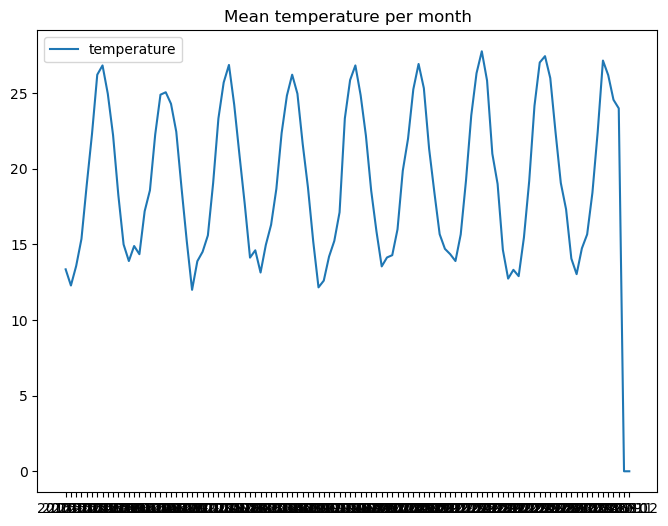

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date,monthly_data, label='temperature')  # Add label for the legend\n",

ax.legend()

ax.set_title('Mean temperature per month')

plt.show()